In [40]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_wine

In [33]:
data = pd.read_csv('wine.csv', header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


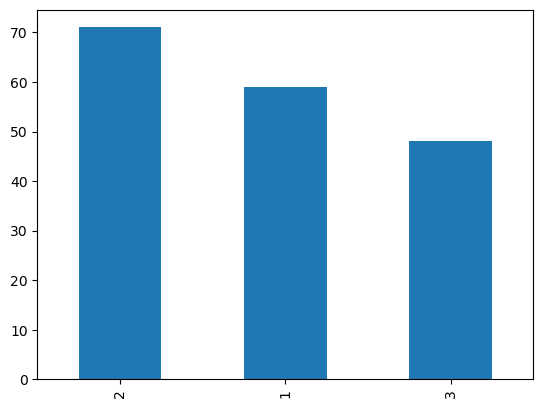

In [35]:
data[0].value_counts().plot.bar();

In [36]:
targets = data[0]
feature_matrix = data.loc[:, data.columns != 0]

In [37]:
train_feature_matrix, test_feature_matrix, train_targets, test_targets = train_test_split(
    feature_matrix, targets, test_size=0.2, random_state=42)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


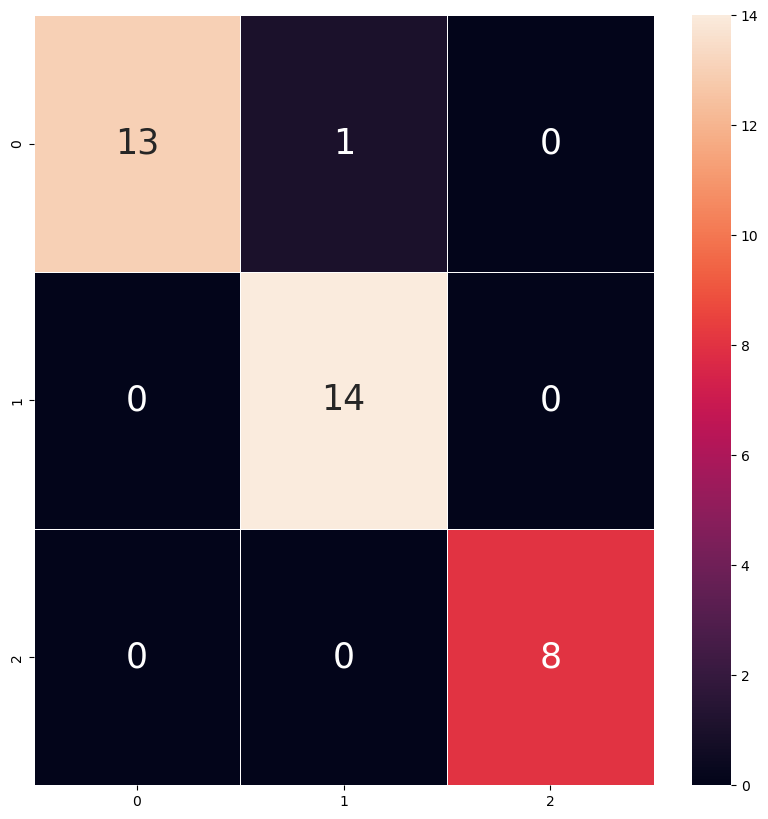

In [48]:
model = LogisticRegression(random_state=42)
model.fit(train_feature_matrix, train_targets)
pred = model.predict(test_feature_matrix)

sns.heatmap(confusion_matrix(test_targets, pred), annot=True, linewidth=0.5,
            linecolor='white', annot_kws={'size': 25});

In [46]:
print(classification_report(test_targets, pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [49]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(train_feature_matrix, train_targets)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [50]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

'linear'

In [51]:
svm_preds = best_model.predict(test_feature_matrix)

In [52]:
print(classification_report(svm_preds, test_targets))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



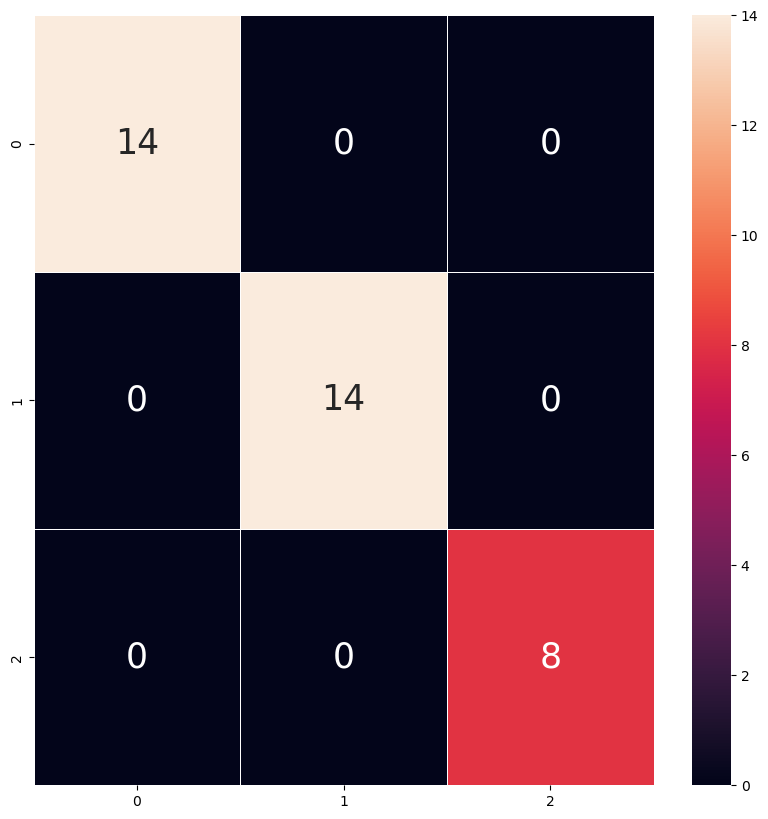

In [53]:
sns.heatmap(confusion_matrix(test_targets, svm_preds), annot=True, linewidth=0.5,
            linecolor='white', annot_kws={'size': 25});

In [68]:
number_of_neighbors = np.arange(3, 15)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors,
         'metric': ['manhattan', 'euclidean'],
         'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

In [69]:
grid_search.fit(train_feature_matrix, train_targets)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [70]:
grid_search.best_score_

0.7753623188405797

In [71]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [72]:
knn_preds = grid_search.predict(test_feature_matrix)

In [73]:
print(classification_report(knn_preds, test_targets))

              precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       0.79      0.92      0.85        12
           3       0.75      0.55      0.63        11

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.79        36
weighted avg       0.80      0.81      0.80        36



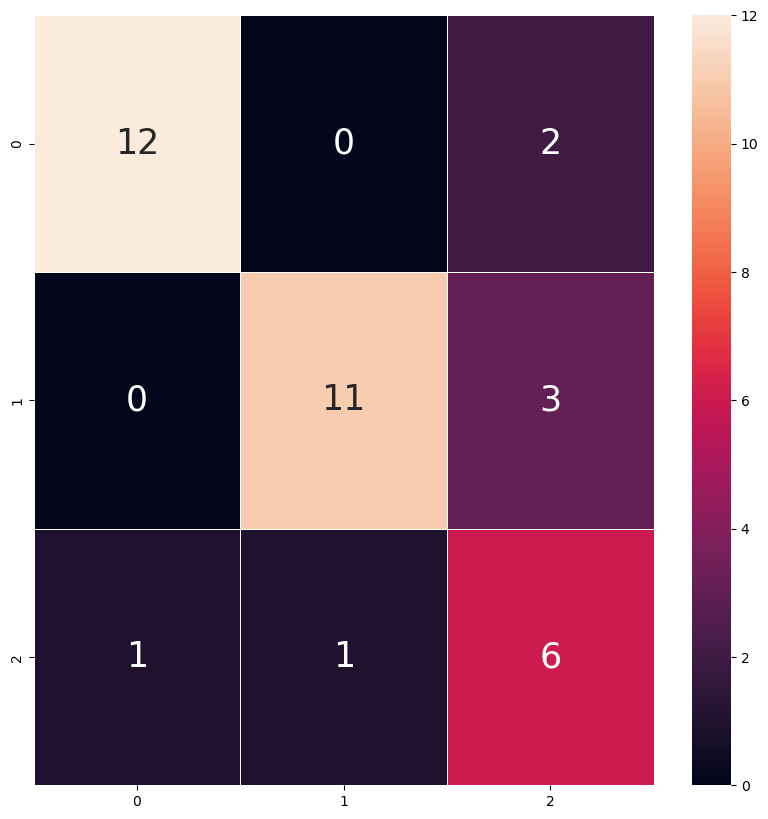

In [74]:
sns.heatmap(confusion_matrix(test_targets, knn_preds), annot=True, linewidth=0.5,
            linecolor='white', annot_kws={'size': 25});